In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Simply drop the null value.

In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [6]:
att['nor_Salnty'] = normalization(att['Salnty'])
att['nor_T_degC'] = normalization(att['T_degC'])

In [7]:
batchSize = 500

In [8]:
x_data = att['nor_Salnty'].loc[:batchSize].tolist()
y_data = att['nor_T_degC'].loc[:batchSize].tolist()
# y_data = b + w * data_x

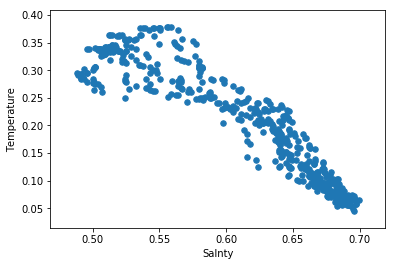

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

# Traning Phase
Randomly generate w and b between -1 and 1.
Adagrad for learning rate.

In [10]:
b = random.uniform(-1, 1) # initial b
w = random.uniform(-1, 1) # initial w
lr = 1 # learning rate
iteration = 2000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

1.5153296254265967 0.437264568308509 3.0357401987595813
0.5156633700344052 -0.5624951616379306 1232.7044312175653
0.5411825541528106 -0.5408850617893782 3.017316968657604
0.5420493631676431 -0.5438269597787745 2.296968241744641
0.5434978223422927 -0.5461788014066508 2.287962637779472
0.5449283989976228 -0.5485379618168973 2.279406085047581
0.5463553477590273 -0.550890267509932 2.2708970156879933
0.5477783412348086 -0.553236073710153 2.2624349419400263
0.54919739840731 -0.5555753904514653 2.2540196039254945
0.5506125299998507 -0.5579082359158319 2.2456507433304362
0.5520237469007304 -0.5602346280402698 2.2373281032708836
0.5534310599632304 -0.5625545847163476 2.22905142828478
0.5548344800104514 -0.5648681237855933 2.2208204643241096
0.5562340178352875 -0.567175263039749 2.212634958747046
0.5576296842005141 -0.5694760202209097 2.204494660310146
0.559021489838874 -0.5717704130216648 2.196399319160571
0.560409445453163 -0.5740584590852383 2.188348686828394
0.5617935617163143 -0.57634017600

0.763539788138881 -0.9089192961094325 1.2504069305926555
0.7643622203888962 -0.9102750785390842 1.2475795766905957
0.7651823792233879 -0.9116271132416853 1.2447678303041871
0.7660002709314011 -0.9129754105846781 1.241971605255414
0.7668159017845438 -0.9143199809067609 1.2391908158423375
0.7676292780370362 -0.9156608345179682 1.236425376836458
0.7684404059257585 -0.9169979816997509 1.233675203480106
0.7692492916703 -0.9183314327050555 1.230940211483833
0.7700559414730068 -0.9196611977584043 1.228220317023825
0.7708603615190304 -0.9209872870559743 1.225515436739323
0.7716625579763751 -0.9223097107656767 1.2228254877300686
0.7724625369959465 -0.923628479027235 1.2201503875537545
0.7732603047115986 -0.9249436019522644 1.217490054223489
0.7740558672401817 -0.9262550896243501 1.214844406205289
0.7748492306815902 -0.9275629520991249 1.2122133624155642
0.7756404011188087 -0.928867199404348 1.2095968422186252
0.7764293846179607 -0.9301678415399823 1.2069947654242261
0.7772161872283546 -0.931464

0.8866835836949083 -1.11192233355116 0.9141871620486188
0.887165660359713 -1.1127170390573038 0.9132156503239969
0.8876464047709026 -1.1135095483387731 0.9122495006341135
0.8881258206112095 -1.1142998674665552 0.9112886833818991
0.8886039115531783 -1.1150880024948417 0.910333169133681
0.889080681259194 -1.1158739594610765 0.9093829286182818
0.8895561333815096 -1.1166577443860013 0.9084379327261207
0.8900302715622751 -1.117439363273702 0.9074981525083202
0.8905030994335644 -1.118218822111656 0.9065635591758194
0.8909746206174043 -1.1189961268707767 0.9056341240984925
0.8914448387258019 -1.1197712835054598 0.9047098188042685
0.891913757360772 -1.1205442979536304 0.9037906149782614
0.8923813801143657 -1.1213151761367868 0.9028764844619016
0.8928477105686972 -1.122083923960047 0.901967399252069
0.8933127522959714 -1.1228505473121948 0.9010633315002421
0.8937765088585121 -1.123615052065723 0.9001642535116344
0.8942389838087889 -1.1243774440768812 0.899270137744351
0.8947001806894441 -1.1251

0.9542391722403953 -1.223288029883373 0.8042527032965471
0.9545345623109349 -1.2237749818053187 0.8038879330930692
0.9548291361160277 -1.2242605881101274 0.8035251760453692
0.9551228959115184 -1.224744852516566 0.8031644210425415
0.9554158439470155 -1.2252277787331218 0.8028056570350038
0.9557079824659085 -1.2257093704580297 0.8024488730341676
0.9559993137053855 -1.2261896313793015 0.8020940581120916
0.9562898398964498 -1.226668565174754 0.8017412014011513
0.9565795632639378 -1.2271461755120365 0.8013902920937085
0.9568684860265351 -1.2276224660486603 0.8010413194417773
0.9571566103967943 -1.2280974404320253 0.8006942727566912
0.9574439385811516 -1.2285711022994492 0.8003491414087841
0.9577304727799437 -1.2290434552781944 0.8000059148270605
0.958016215187425 -1.2295145029854966 0.799664582498865
0.958301167991784 -1.2299842490285917 0.7993251339695727
0.9585853333751603 -1.2304526970047445 0.7989875588422617
0.9588687135136613 -1.2309198505012755 0.7986518467773918
0.9591513105773792 -

0.9981231206147194 -1.2956309281832636 0.7611250853521028
0.9982972461691182 -1.2959179750000471 0.7609983326571834
0.9984708905694145 -1.296204228632031 0.7608722794916905
0.9986440551452072 -1.2964896912710644 0.7607469219949822
0.99881674122242 -1.296774365102939 0.7606222563277241
0.9989889501233129 -1.2970582523074057 0.7604982786717672
0.9991606831664914 -1.2973413550581911 0.7603749852300387
0.9993319416669167 -1.2976236755230148 0.7602523722264183
0.9995027269359162 -1.2979052158636057 0.7601304359056312
0.9996730402811933 -1.2981859782357184 0.7600091725331241
0.9998428830068371 -1.2984659647891494 0.7598885783949552
1.000012256413333 -1.2987451776677548 0.7597686497976822
1.000181161797572 -1.2990236190094653 0.7596493830682447
1.0003496004528618 -1.299301290946303 0.7595307745538571
1.000517573668935 -1.299578195604399 0.7594128206218882
1.00068508273196 -1.2998543351040075 0.7592955176597612
1.0008521289245513 -1.3001297115595236 0.7591788620748339
1.0010187135257784 -1.300

1.0232653141149353 -1.3370779560534671 0.746453958119611
1.023369965668556 -1.337250474648886 0.7464081729207546
1.0234743280459055 -1.3374225165358282 0.746362640401829
1.0235784020460545 -1.3375940830315645 0.7463173591683332
1.0236821884658647 -1.3377651754497257 0.7462723278334704
1.0237856880999963 -1.3379357951003126 0.7462275450180845
1.0238889017409132 -1.3381059432897062 0.746183009350642
1.0239918301788897 -1.3382756213206772 0.7461387194671725
1.0240944742020166 -1.3384448304923964 0.7460946740112376
1.024196834596206 -1.3386135721004444 0.7460508716338794
1.0242989121451993 -1.3387818474368218 0.74600731099359
1.0244007076305714 -1.338949657789959 0.7459639907562609
1.0245022218317377 -1.3391170044447258 0.7459209095951496
1.0246034555259598 -1.3392838886824414 0.7458780661908353
1.0247044094883513 -1.3394503117808847 0.7458354592311747
1.0248050844918841 -1.3396162750143032 0.7457930874112734
1.024905481307394 -1.3397817796534235 0.7457509494334341
1.0250056007035866 -1.33

1.0378666119659883 -1.3611482667275538 0.7412901435563014
1.0379309168637878 -1.3612542736654198 0.741272856446088
1.037995044073068 -1.3613599876828975 0.7412556647399524
1.0380589940848235 -1.3614654095893939 0.7412385679113775
1.0381227673886921 -1.3615705401920792 0.7412215654367535
1.0381863644729588 -1.3616753802958936 0.7412046567953582
1.038249785824559 -1.3617799307035525 0.7411878414693459
1.0383130319290825 -1.3618841922155533 0.7411711189437256
1.038376103270778 -1.3619881656301818 0.7411544887063513
1.0384390003325552 -1.3620918517435172 0.7411379502478981
1.03850172359599 -1.3621952513494398 0.7411215030618598
1.038564273541327 -1.3622983652396352 0.7411051466445207
1.0386266506474846 -1.3624011942036023 0.7410888804949471
1.038688855392057 -1.3625037390286578 0.7410727041149657
1.0387508882513192 -1.3626060004999432 0.7410566170091574
1.03881274970023 -1.36270797940043 0.7410406186848362
1.0388744402124355 -1.3628096765109268 0.7410247086520313
1.0389359602602732 -1.3629

1.0474200003008372 -1.3768970740522934 0.7392462281530583
1.0474579071154428 -1.3769595636213896 0.7392402209944767
1.047495709185374 -1.3770218805183787 0.7392342469881598
1.0475334068000632 -1.3770840252203917 0.7392283059511463
1.0475710002481433 -1.377145998203241 0.7392223977014853
1.0476084898174494 -1.3772077999414245 0.7392165220582305
1.0476458757950213 -1.3772694309081286 0.739210678841435
1.0476831584671058 -1.3773308915752323 0.7392048678721419
1.0477203381191582 -1.3773921824133109 0.7391990889723852
1.047757415035846 -1.3774533038916388 0.7391933419651775
1.047794389501049 -1.3775142564781946 0.7391876266745133
1.0478312617978633 -1.377575040639663 0.7391819429253546
1.0478680322086027 -1.3776356568414392 0.739176290543628
1.0479047010148006 -1.3776961055476329 0.7391706693562261
1.0479412684972125 -1.377756387221071 0.7391650791909936
1.0479777349358181 -1.3778165023233013 0.7391595198767225
1.048014100609824 -1.377876451314597 0.7391539912431556
1.0480503657976643 -1.37

1.0533803638884542 -1.3867227625563336 0.7385058500012385
1.0534018009425619 -1.3867581016448185 0.7385039288356356
1.053423178761515 -1.3867933430838615 0.7385020182725471
1.0534444975089927 -1.386828487143289 0.7385001182534555
1.0534657573482227 -1.3868635340921818 0.7384982287201717
1.0534869584419806 -1.3868984841988772 0.7384963496148284
1.053508100952593 -1.386933337730971 0.7384944808798733
1.0535291850419377 -1.3869680949553194 0.7384926224580761
1.0535502108714454 -1.3870027561380416 0.7384907742925206
1.0535711786021003 -1.387037321544521 0.7384889363266051
1.0535920883944419 -1.3870717914394084 0.7384871085040375
1.0536129404085663 -1.3871061660866224 0.7384852907688414
1.0536337348041274 -1.3871404457493528 0.7384834830653448
1.0536544717403373 -1.387174630690062 0.7384816853381854
1.0536751513759688 -1.3872087211704878 0.738479897532308
1.0536957738693553 -1.3872427174516437 0.7384781195929555
1.0537163393783935 -1.3872766197938227 0.7384763514656804
1.0537368480605431 -1

1.0566899466967399 -1.392178625994805 0.7382721912277133
1.0567022386682219 -1.3921988893698864 0.73827155957596
1.0567144966743696 -1.3922190967529484 0.7382709314101583
1.0567267208090367 -1.392239248298709 0.7382703067110735
1.0567389111658174 -1.3922593441614584 0.7382696854595721
1.056751067838047 -1.3922793844950607 0.7382690676366263
1.056763190918803 -1.3922993694529548 0.738268453223318
1.056775280500906 -1.392319299188156 0.7382678422008246
1.05678733667692 -1.3923391738532556 0.7382672345504384
1.056799359539153 -1.3923589936004246 0.7382666302535463
1.056811349179658 -1.3923787585814127 0.7382660292916425
1.056823305690234 -1.3923984689475506 0.7382654316463201
1.056835229162426 -1.392418124849751 0.7382648372992789
1.0568471196875258 -1.392437726438509 0.7382642462323133
1.0568589773565735 -1.3924572738639045 0.7382636584273222
1.0568708022603575 -1.3924767672756024 0.7382630738663046
1.056882594489415 -1.3924962068228541 0.7382624925313567
1.056894354134033 -1.39251559265

1.0585663940982193 -1.3952719587099858 0.7381959975388835
1.0585735010461967 -1.395283674548473 0.7381957863841119
1.0585805883561652 -1.3952953580136058 0.7381955763946588
1.0585876560823884 -1.395307009194839 0.7381953675640945
1.0585947042789803 -1.3953186281813799 0.7381951598860214
1.0586017329999056 -1.395330215062189 0.7381949533540811
1.0586087422989798 -1.3953417699259814 0.7381947479619454
1.0586157322298695 -1.3953532928612271 0.7381945437033278
1.058622702846093 -1.3953647839561512 0.7381943405719699
1.058629654201021 -1.3953762432987356 0.7381941385616488
1.0586365863478766 -1.3953876709767183 0.7381939376661847
1.0586434993397356 -1.395399067077596 0.7381937378794177
1.0586503932295275 -1.3954104316886222 0.7381935391952328
1.0586572680700352 -1.3954217648968108 0.738193341607543
1.058664123913896 -1.395433066788934 0.7381931451102991
1.058670960813602 -1.395444337451525 0.7381929496974825
1.0586777788214994 -1.3954555769708776 0.7381927553631085
1.0586845779897907 -1.395

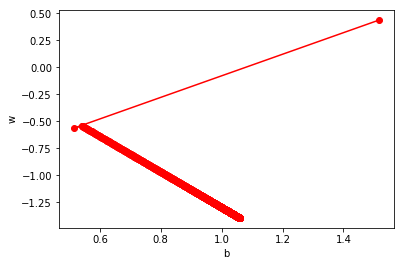

In [11]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

# Visualiazation of Loss
The loss value stopped changing dramatically after the second iteration so I only plotted the first 10 iterations.

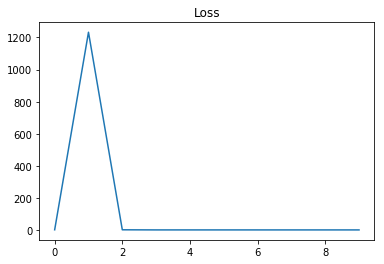

In [12]:
# visualize the loss
fig = plt.figure()
plt.title("Loss")
plt.plot(range(0,10), loss_history[0:10])    
plt.show()

# Denomalization *w and *b

In [13]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b)+min(y)
    return den_w, den_b

In [14]:
x_output = att['T_degC'].loc[:batchSize].tolist()
y_output = att['Salnty'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-0.25717540277380163, 35.27244716798616)

# Plot the result

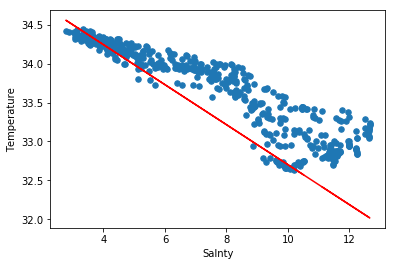

In [15]:
# x_output = att['nor_Salnty'].loc[:batchSize].tolist()
# y_output = att['T_degC'].loc[:batchSize].tolist()

plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = pd.Series(x_output)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')
plt.show()